In [1]:
from __future__ import division, print_function, unicode_literals

from sklearn import preprocessing
import numpy as np
import pandas as pd

In [2]:
np.random.seed(42)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [4]:
from sklearn import datasets, model_selection, linear_model, metrics
diabetes=datasets.load_diabetes(return_X_y=False)
X_train,X_valid,y_train,y_valid=\
    model_selection.train_test_split(diabetes['data'],diabetes['target'],random_state=42)
a=[X_train,X_valid,y_train,y_valid]
for i in a:
    print(i.shape)

(331, 10)
(111, 10)
(331,)
(111,)


In [5]:
X=pd.DataFrame(diabetes['data'])
X.columns=diabetes.feature_names
X[:5]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


data has been normalized. 

In [6]:
# Import relevant functions
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [7]:
n_alphas = 200
alphas = np.logspace(-4, 1, n_alphas)

coefs = []
Ridge_mse_valid=[]
Ridge_mse_train=[]
for a in alphas:
    ridge=linear_model.Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    Ridge_mse_valid.append(\
            mean_squared_error(y_true=y_valid,y_pred=ridge.predict(X_valid)))
    Ridge_mse_train.append(\
            mean_squared_error(y_true=y_train,y_pred=ridge.predict(X_train)))

In [8]:
n_alphas = 200
alphas = np.logspace(-4, 1, n_alphas)

coefs = []
Lasso_mse_valid=[]
Lasso_mse_train=[]
best_alpha=0
best_MSE=10000
for a in alphas:
    Lasso=linear_model.Lasso(alpha=a)
    Lasso.fit(X_train, y_train)
    coefs.append(Lasso.coef_)
    Lasso_mse_valid.append(\
            mean_squared_error(y_true=y_valid,y_pred=Lasso.predict(X_valid)))
    Lasso_mse_train.append(\
            mean_squared_error(y_true=y_train,y_pred=Lasso.predict(X_train)))
    if mean_squared_error(y_true=y_valid,y_pred=Lasso.predict(X_valid)) < best_MSE:
        best_MSE= mean_squared_error(y_true=y_valid,y_pred=Lasso.predict(X_valid))
        best_alpha= a
print(best_MSE,best_alpha)

2753.8856808552746 0.10353218432956626


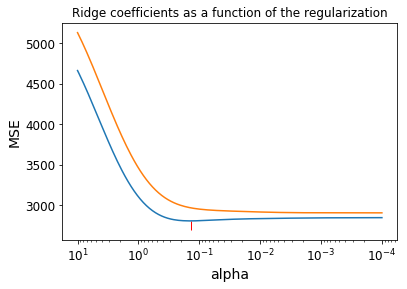

alpha = 0.14 when MSE reaches minimum (2808.0)


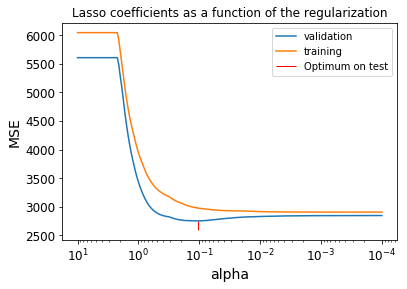

alpha = 0.1 when MSE reaches minimum (2754.0)


In [9]:
fig=plt.figure(figsize=[6,4])
ax = plt.gca()
plt.plot(alphas, Ridge_mse_valid)
plt.plot(alphas, Ridge_mse_train)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.vlines(alphas[np.argmin(Ridge_mse_valid)],  plt.ylim()[0],np.min(Ridge_mse_valid), color='r',
           linewidth=1, label='Optimum on test')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()
print(f'alpha = {round(alphas[np.argmin(Ridge_mse_valid)],2)} when MSE reaches minimum ({round(np.min(Ridge_mse_valid))})')


fig=plt.figure(figsize=[6,4])
ax = plt.gca()
plt.plot(alphas, Lasso_mse_valid,label='validation')
plt.plot(alphas, Lasso_mse_train,label='training')
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.vlines(alphas[np.argmin(Lasso_mse_valid)],  plt.ylim()[0],np.min(Lasso_mse_valid), color='r',
           linewidth=1, label='Optimum on test')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()
print(f'alpha = {round(alphas[np.argmin(Lasso_mse_valid)],2)} when MSE reaches minimum ({round(np.min(Lasso_mse_valid))})')

(c) prefer Lasso regression for it has lower MSE when choosing suitable alpha.

In [10]:

n_alphas = 200
alphas = np.logspace(-4, 1, n_alphas)
l1_ratios = np.linspace(0,1.0,10,endpoint=True)
Elastic_MSE=[]
LMSE=0
a_LMSE=0
for b in l1_ratios:
    for a in alphas:
        Elastic=linear_model.ElasticNet(alpha=a,l1_ratio=b)
        Elastic.fit(X_train,y_train)
        Elastic_MSE.append(mean_squared_error(y_true=y_valid,y_pred=Elastic.predict(X_valid)))
        
print(size(Elastic_MSE=[]))      

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

NameError: name 'size' is not defined

alpha = 0.104, l1_ratio = 1.0 when MSE reaches minimum (2754.0)


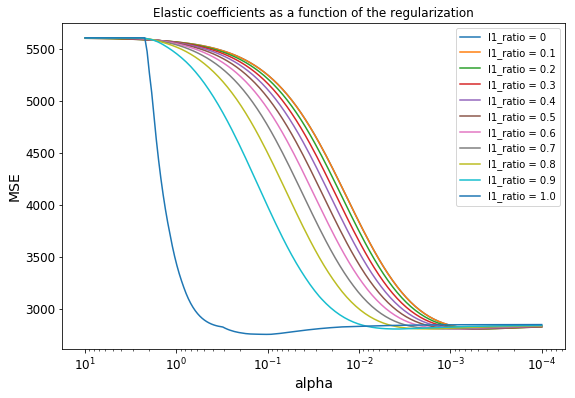

In [12]:

fig=plt.figure(figsize=[9,6])
Elastic_MSE=np.array(Elastic_MSE)
Elastic_MSE.reshape(200,10)
LMSE=np.min(Elastic_MSE)
ax = plt.gca()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  
print(f'alpha = {round(alphas[np.argmin(Elastic_MSE)%200],3)}, l1_ratio = {l1_ratios[np.argmin(Elastic_MSE)//200]} when MSE reaches minimum ({round(LMSE)})')
plt.plot(alphas,Elastic_MSE[:200],label=f'l1_ratio = {0}')

for i in range(1,11):
    plt.plot(alphas,Elastic_MSE[200*(i-1):200*i],label=f'l1_ratio = {round(0.1*i,1)}')
# reverse axis
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Elastic coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

(e) By comparing the minimum MSE, I find that exists at l1_ratio = 1.0, which means the model equivalents to Lasso regression. If I have to choose ElasticNet, I would set alpha = 0.104, L1_ratio = 1.  
